In [ ]:
import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

%matplotlib inline

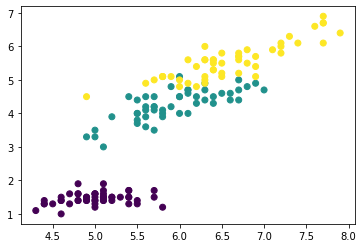

In [ ]:
iris=load_iris()
data=iris.data[:,[0,2]]
label=iris.target
plt.scatter(data[:,0],data[:,1],c=label)

In [ ]:
def kmeans(data, k=3):
  np.seterr(divide='ignore', invalid='ignore')
  label=np.zeros(data.shape[0])
  n_cluster=np.zeros((k,1))
  centroids=np.zeros((k,data.shape[1]))
  new_centroids=np.zeros((k,data.shape[1]))
  x_max=np.max(data[:,0])
  x_min=np.min(data[:,0])
  y_max=np.max(data[:,1])
  y_min=np.min(data[:,1])

  for x in range(k):
    init_x = np.random.uniform(x_min,x_max)
    init_y = np.random.uniform(y_min,y_max)
    centroids[x] = (init_x,init_y)
  for i in range(1000):
    #この辺
    for x in range(data.shape[0]):
      for y in range(len(centroids)):
        u1 = data[x][0]-centroids[y][0]
        u2 = data[x][1]-centroids[y][1]
        n_cluster[y] = (u1+u2)**2
      label[x] = np.argmin(n_cluster)
    for x in range(k):
      k_mask = (label == x)
      masking_data = data[k_mask]
      x_new = np.average(masking_data[:,0])
      y_new = np.average(masking_data[:,1])
      new_centroids[x] = (x_new,y_new)
    if (new_centroids==centroids).all():
      break
    else:
      centroids=new_centroids

  return label 

In [ ]:
kmeans(data)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       2., 0., 0., 2., 1., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       0., 2., 0., 2., 0., 2., 2., 0., 0., 0., 2., 2., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0.])

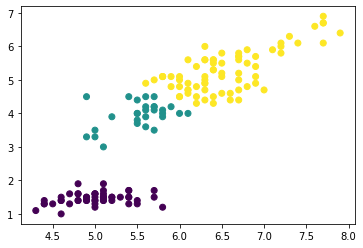

In [ ]:
plt.scatter(data[:,0],data[:,1],c=kmeans(data))

In [ ]:
a=np.random.random((5,2))
a

array([[0.69956616, 0.52596395],
       [0.71638009, 0.98844975],
       [0.50010985, 0.38707822],
       [0.22004469, 0.5997955 ],
       [0.24129632, 0.69730215]])

In [ ]:
b=np.array([True,False,False,True,True])
b

array([ True, False, False,  True,  True])

In [ ]:
a[b]

array([[0.69956616, 0.52596395],
       [0.22004469, 0.5997955 ],
       [0.24129632, 0.69730215]])

In [ ]:
a=np.zeros((3,1))
a

array([[0.],
       [0.],
       [0.]])

In [ ]:
data

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
data[1][1]

1.4